In [89]:
print("="*70)
print("ZOO ANIMAL CLASSIFICATION - LAB EXAM")
print("="*70)
print(f"Roll Number : {ROLL_NUMBER}")
print(f"Seat Number: {SEAT_NUMBER}")
print(f"Methon Prefix: {METHOD_PREFIX}")
print("="*70)

ZOO ANIMAL CLASSIFICATION - LAB EXAM
Roll Number : 24UG00561
Seat Number: 4
Methon Prefix: Alpha


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [88]:
ROLL_NUMBER = "24UG00561"
SEAT_NUMBER = 4
METHOD_PREFIX ="Alpha"

In [90]:
def alpha_load_integrate():
  df1 = pd.read_csv('/content/zoo.csv')
  df2 = pd.read_csv('/content/class.csv')
  df3 = pd.read_json('/content/auxiliary_metadata.json')

  return df1, df2, df3

In [91]:
df1, df2, df3 = alpha_load_integrate()

In [13]:
df1["animal_name"] = df1["animal_name"].str.upper()

In [22]:
df = alpha_load_integrate()
df["Animal_Names"] = df["Animal_Names"].str.upper()

In [23]:
df.to_csv('/content/class.csv', index=False)

In [21]:
df3['animal_name'] = df3['animal_name'].str.upper()

In [26]:
df3['conservation_status'] = df3['conservation_status'].fillna('').astype(str) + " " + df3['conservation'].fillna('').astype(str) + " " + df3['status'].fillna('').astype(str)

In [28]:
df3 = df3.drop(columns=['conservation', 'status'])

In [30]:
df3['habitat_type'] = df3['habitat'].fillna('').astype(str) + " " + df3['habitats'].fillna('').astype(str)

In [31]:
df3 = df3.drop(columns=['habitat', 'habitats'])

In [ ]:
df3['diet'] = df3['diet'].str.strip().str.lower()
df3 = df3.drop(['diet_type'], axis=1)

In [38]:
print(df3['diet'].unique())

['insectivore  ' 'herbivore  ' 'carnivore  ' 'omnivore  ' 'omnivor  '
 ' herbivore herbivore' 'filter_feeder  ' 'Herbivore  ']


In [49]:
diet_replacements = {
    'omnivor': 'omnivore',
    'herbivore herbivore': 'herbivore',
    'Herbivore  ': 'herbivore',
    'filter_feeder  ':'filter_feeder',
    'insectivore  ': 'insectivore',
    'herbivore  ' : 'herbivore',
    'carnivore  ':'carnivore',
    'omnivore  ': 'omnivore'

}
df3['diet'] = df3['diet'].replace(diet_replacements)

In [50]:
print(df3['diet'].unique())

['insectivore' 'herbivore' 'carnivore' 'omnivore' 'filter_feeder']


In [51]:
df['Animal_Names'] = df['Animal_Names'].str.split(', ')
df = df.explode('Animal_Names')
df = df.rename(columns={'Animal_Names': 'animal_name'})

In [53]:
merged_df = pd.merge(df1, df3, on='animal_name', how='outer')
merged_df = pd.merge(merged_df, df, on='animal_name', how='outer')

In [55]:
for column in merged_df.columns:
    if merged_df[column].isnull().any():
        if pd.api.types.is_numeric_dtype(merged_df[column]):
            merged_df[column] = merged_df[column].fillna(merged_df[column].mean())
        else:

            mode_ = merged_df[column].mode()[0]
            merged_df[column] = merged_df[column].fillna(mode_)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   animal_name                        103 non-null    object 
 1   hair                               103 non-null    int64  
 2   feathers                           103 non-null    int64  
 3   eggs                               103 non-null    int64  
 4   milk                               103 non-null    int64  
 5   airborne                           103 non-null    int64  
 6   aquatic                            103 non-null    int64  
 7   predator                           103 non-null    int64  
 8   toothed                            103 non-null    int64  
 9   backbone                           103 non-null    int64  
 10  breathes                           103 non-null    int64  
 11  venomous                           103 non-null    int64  

In [59]:
merged_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,catsize,class_type,diet,conservation_status,habitat_type,alpha_is_endangered,alpha_diet_complexity,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type
0,AARDVARK,1,0,0,1,0,0,1,1,1,...,1,1,insectivore,least concern,savanna,0.0,1.0,1,41,Mammal
1,ANTELOPE,1,0,0,1,0,0,0,1,1,...,1,1,herbivore,near threatened,grasslands,0.0,1.0,1,41,Mammal
2,BASS,0,0,1,0,0,1,1,1,1,...,0,4,carnivore,least,freshwater,0.0,3.0,4,13,Fish
3,BEAR,1,0,0,1,0,0,1,1,1,...,1,1,omnivore,vulnerable,forest,1.0,2.0,1,41,Mammal
4,BOAR,1,0,0,1,0,0,1,1,1,...,1,1,omnivore,least concern,forest,0.0,2.0,1,41,Mammal


In [57]:
df3['alpha_is_endangered'] = df3['conservation_status'].apply(lambda x: 1 if any(keyword in x.lower() for keyword in ['vulnerable', 'endangered', 'critically']) else 0)

In [58]:
diet_complexity_map = {
    'carnivore': 3,
    'omnivore': 2,
    'herbivore': 1,
    'insectivore': 1,
    'filter_feeder': 1}
df3['alpha_diet_complexity'] = df3['diet'].map(diet_complexity_map)

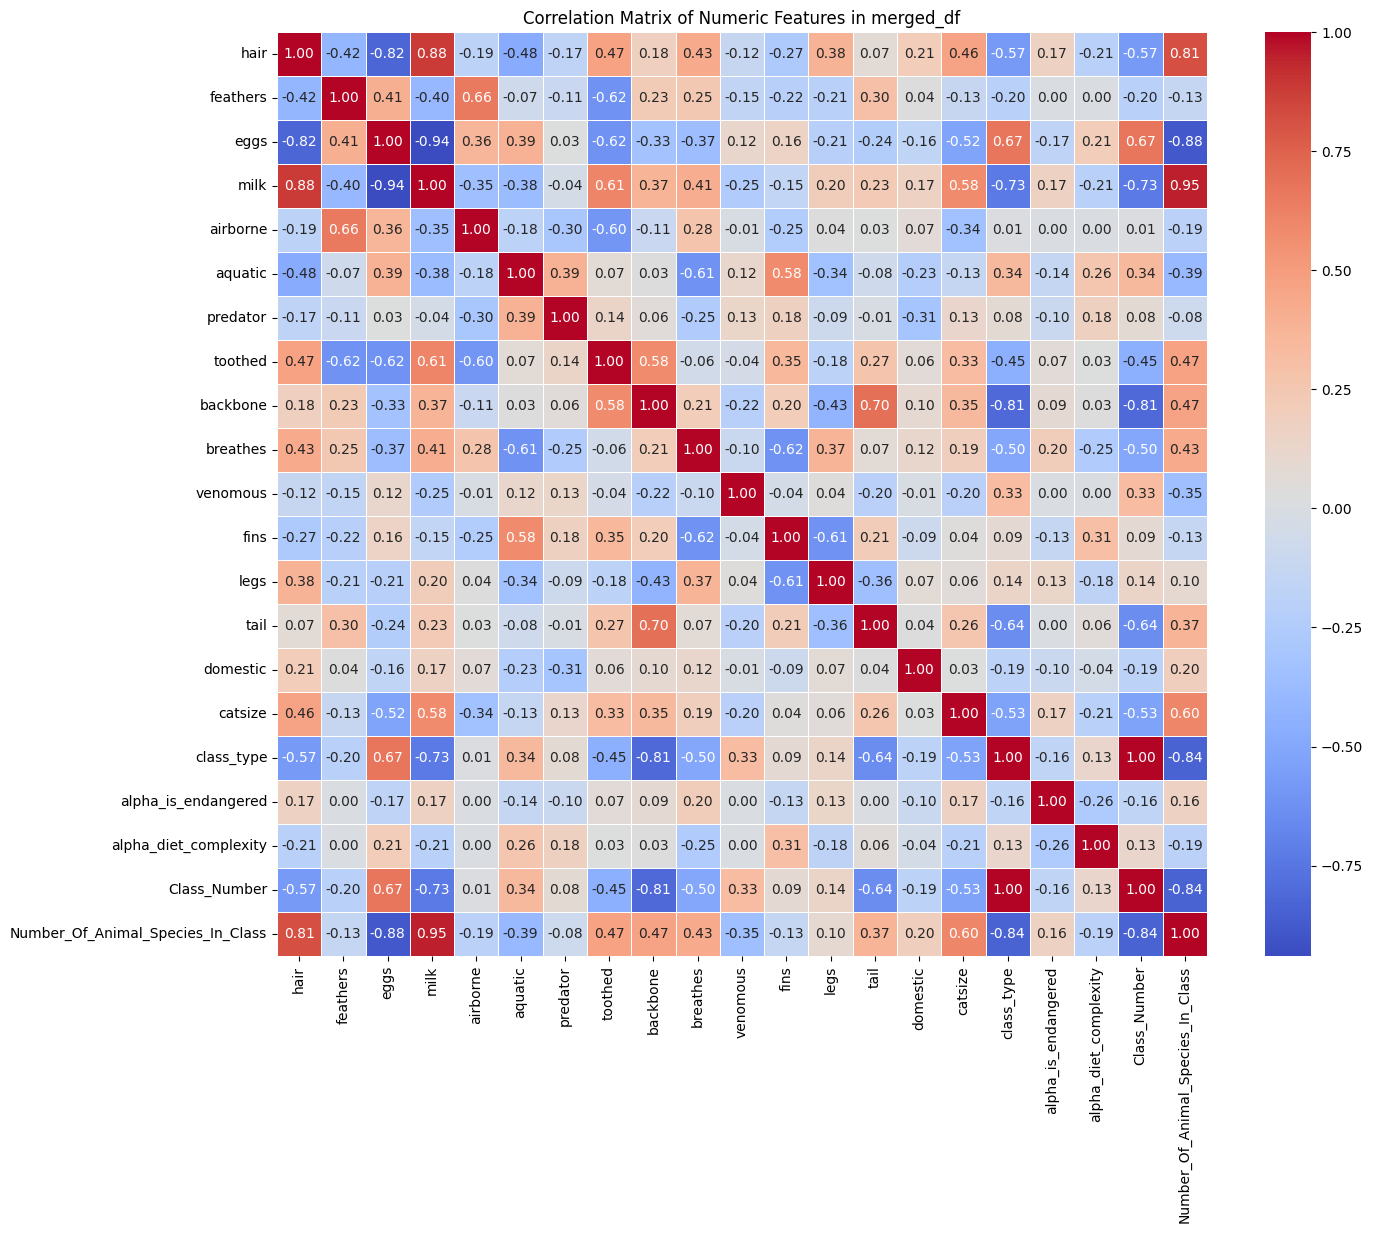

In [73]:
plt.figure(figsize=(15, 12))
sns.heatmap(numeric_merged_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features in merged_df')
plt.show()

In [81]:



def alpha_train_and_evaluate():
    X = merged_df.drop(columns=['class_type', 'animal_name', 'Class_Number', 'alpha_is_endangered', 'alpha_diet_complexity','Class_Type'])
    y = merged_df['Class_Type']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    rf = RandomForestClassifier(n_estimators=150, max_depth=15,  min_samples_split=2, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred)
    accuracy_test = accuracy_score(y_test, y_pred)

    print(f"Accuracy of train: {accuracy_train:.4f}")
    print(f"Accuracy of test: {accuracy_test:.4f}")
    print(f"Overfitting Gap: {accuracy_train - accuracy_test:.4f}")

In [ ]:
class